# Definição das Colunas.
**Pessoas**
- ID: Identificador exclusivo do cliente
- Year_Birth: Ano de nascimento do cliente
- Education: nível de educação do cliente
- Marital_Status: estado civil do cliente
- Income: renda familiar anual do cliente
- Kidhome: número de crianças na casa do cliente
- Teenhome: número de adolescentes na casa do cliente
- Dt_Customer: Data de cadastro do cliente na empresa
- Recency: número de dias desde a última compra do cliente
- Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário

**Produtos**

- MntWines: Valor gasto em vinho nos últimos 2 anos
- MntFruits: Valor gasto com frutas nos últimos 2 anos
- MntMeatProducts: Valor gasto com carne nos últimos 2 anos
- MntFishProducts: Valor gasto com pescado nos últimos 2 anos
- MntSweetProducts: Valor gasto em doces nos últimos 2 anos
- MntGoldProds: Valor gasto em ouro nos últimos 2 anos

**Promoção**

- NumDealsPurchases: Número de compras feitas com desconto
- AcceptedCmp1: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
- AcceptedCmp2: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
- AcceptedCmp3: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
- AcceptedCmp4: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
- AcceptedCmp5: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
- Response: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário**

**Lugar**

- NumWebPurchases: Número de compras realizadas através do site da empresa
- NumCatalogPurchases: Número de compras feitas usando um catálogo
- NumStorePurchases: Número de compras feitas diretamente nas lojas
- NumWebVisitsMonth: Número de visitas ao site da empresa no último mês



# Importação e Descrição Básica dos Dados.

In [ ]:
#Importação das Bibliotecas

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import warnings 
warnings.filterwarnings("ignore")

In [158]:
#Definição para conseguirmos ver todas as colunas no dataframe.

In [3]:
pd.set_option('display.max_columns',None)

In [159]:
#Visualização do dataset

In [4]:
df = pd.read_csv('marketing_campaign.csv',sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [160]:
#Criação de um novo arquivo apenas para visualização estatistica dos dados.

In [5]:
dados = ProfileReport(df,'Clientes Ideiais')
dados.to_file('Analise_Geral.html')

**Visualizando o arquivo Análise_Geral.html.Conseguimos observar que possuímos 3 colunas Categóricas,
26 colunas Numéricas,Também conseguimos observar o std, media, mediana, os 4 quartis,
valor máximo, mínimo, células ausentes, valores nulos e zeros, de cada coluna do nosso dataset,
nosso arquivo também nos mostra alguns valores comuns,extremos e suas devidas frequências na coluna.
Resumindo,conseguimos ter toda descrição básica e necessária do nosso dataset,apenas em um arquivo.**

# Tratamento dos Dados.

In [161]:
#Excluindo colunas desnecessárias no nosso df original.

In [6]:
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [162]:
#Conseguimos Visuzalizar no 'Analise_Geral.html' que a Coluna Income possui 24 valores ausentes,
#E os dados são do tipo Float,vamos verificar se existe algum valor diferente de Float.

In [7]:
for renda in df['Income']:
    if renda != float(renda):
        print(renda)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [163]:
#A coluna Income,possui a renda anual de todos clientes,naõ podemos simplesmente deixar um cliente sem renda anual,
#Pois pode afetá-lo de diversas formas,Então iremos preencher esses valores ausentes,
#mas antes vamos visualizar a distribuição dos dados,e decidir como vamos preencher os dados.

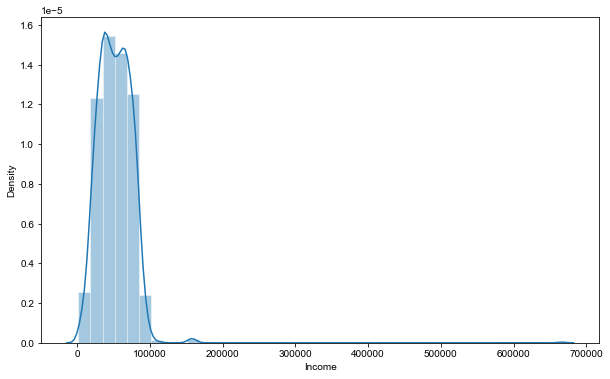

In [8]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style="dark")
sns.distplot(df['Income'],bins=40)
plt.show()

In [157]:
#Preenchendo os valores ausentes com a média.

In [9]:
media = df.Income.mean()
df['Income'].fillna(media,inplace=True)
df['Income'].isnull().sum()

0

In [156]:
#Variaveis numéricas relevantes e suas correlações

In [10]:
copia_df = df.copy()
copia_df.drop(['ID','Marital_Status','Education','Dt_Customer'],axis=1,inplace=True)
copia_df.corr()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
Year_Birth,1.000000,-0.160942,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,0.021325
Income,-0.160942,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,0.437497,0.436162,0.321978,-0.082290,0.380550,0.586725,0.526489,-0.549824,-0.016168,0.182791,0.334850,0.274921,0.087538,-0.027223,0.132756
Kidhome,0.230176,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,-0.080008
Teenhome,-0.352111,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,-0.154446
Recency,-0.019871,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,-0.198437
MntWines,-0.157773,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,0.247254
MntFruits,-0.017917,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,0.125289
MntMeatProducts,-0.030872,0.577802,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,0.236335
MntFishProducts,-0.041625,0.437497,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,0.111331
MntSweetProducts,-0.018133,0.436162,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,-0.120100,0.348544,0.490924,0.448756,-0.423294,0.001530,0.028641,0.259590,0.241818,0.009985,-0.022485,0.117372


In [155]:
##Temos dados irrelevantes na Coluna Marital_Status, podemos exclui-los.

In [11]:
df[df['Marital_Status'] == 'Absurd']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,1
2134,4369,1957,Master,Absurd,65487.0,0,0,10-01-2014,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,0


In [12]:
df[df['Marital_Status'] == 'YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2177,492,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,1


In [13]:
df.drop([2177,2202,2093,2134],inplace=True)

# Análise de Negócios.
 **Buscaremos obter Insights nos nossos dados,Afim de trazer a melhora no atendimento do cliente,
   e também o aumento dos clientes,vamos relacionar os dados para que possamos mostrar fatos e métodos,
   que iram ajudar a empresa a alavancar,e ver respostas ocultas, que não tinham antes.**

In [154]:
#Verificando as datas

In [14]:
df['Dt_Customer'].value_counts()

31-08-2012    12
12-05-2014    11
14-02-2013    11
12-09-2012    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 663, dtype: int64

In [153]:
#O arquivo Analise_Cliente nos mostra que,o número máximo de dias que um client, 
#ficou sem comprar foi 99 dias, vamos conferir.

In [15]:
df['Recency'].max()

99

In [152]:
#Vamos conferir Também os Top_10 Clientes que ficaram mais dias sem comprar.

In [16]:
clientes_10 = (df.nlargest(10,'Recency'))
clientes_10

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
38,8595,1973,Graduation,Widow,42429.0,0,1,11-02-2014,99,55,0,6,2,0,4,2,1,1,3,5,0,0,0,0,0,0,0
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
208,868,1966,Graduation,Married,44794.0,0,1,08-06-2014,99,54,0,7,0,0,4,1,2,0,3,6,0,0,0,0,0,0,0
444,2106,1974,2n Cycle,Married,20130.0,0,0,17-03-2014,99,0,6,3,7,6,12,1,1,0,3,8,0,0,0,0,0,0,0
491,22,1976,Graduation,Divorced,46310.0,1,0,03-12-2012,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0
606,7232,1973,Graduation,Widow,42429.0,0,1,11-02-2014,99,55,0,6,2,0,4,2,1,1,3,5,0,0,0,0,0,0,0
685,10142,1976,PhD,Divorced,66476.0,0,1,07-03-2013,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0
700,9977,1973,Graduation,Divorced,78901.0,0,1,17-09-2013,99,321,11,309,33,26,34,3,9,3,5,4,0,0,0,0,0,0,0
725,7212,1966,Graduation,Married,44794.0,0,1,08-06-2014,99,54,0,7,0,0,4,1,2,0,3,6,0,0,0,0,0,0,0
1033,5263,1977,2n Cycle,Married,31056.0,1,0,22-01-2013,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0


In [151]:
#Vamos ver agora os Top_10 clientes que mais compram

In [17]:
top10_compradores = df[df['Recency'] == 0]
top10_compradores[0:10]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
23,4047,1954,PhD,Married,65324.0,0,1,11-01-2014,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0
66,1386,1967,Graduation,Together,32474.0,1,1,11-05-2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0
100,1473,1960,2n Cycle,Single,47823.0,0,1,23-07-2013,0,53,1,5,2,1,10,2,2,0,3,8,0,0,0,0,0,0,0
160,2795,1958,Master,Single,30523.0,2,1,01-07-2013,0,5,0,3,0,0,5,1,1,0,2,7,0,0,0,0,0,0,0
347,1826,1970,Graduation,Divorced,84835.0,0,0,16-06-2014,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,0,1
391,5642,1979,Master,Together,62499.0,1,0,09-12-2013,0,140,4,61,0,13,4,2,3,1,6,4,0,0,0,0,0,0,0
536,1991,1967,Graduation,Together,44931.0,0,1,18-01-2014,0,78,0,11,0,0,7,1,2,1,3,5,0,0,0,0,0,0,0
551,5371,1989,Graduation,Single,21474.0,1,0,08-04-2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,0,1
749,4073,1954,2n Cycle,Married,63564.0,0,0,29-01-2014,0,769,80,252,15,34,65,1,10,10,7,6,1,0,0,0,0,0,1
758,10470,1979,Master,Married,40662.0,1,0,15-03-2013,0,40,2,23,0,4,23,2,2,1,3,4,0,0,0,0,0,0,0


In [66]:
produtos = df[['MntWines','MntFruits','MntMeatProducts',
               'MntFishProducts','MntSweetProducts','MntGoldProds']].values
total = sum(produtos)
print(f'MntWines = {total[0]}\nMntFruits = {total[1]}\nMntMeatProducts = {total[2]}\nMntFishProducts = {total[3]}\nMntSweetProducts = {total[4]}\nMntGoldProds = {total[5]}')

MntWines = 679461
MntFruits = 58742
MntMeatProducts = 373243
MntFishProducts = 83638
MntSweetProducts = 60554
MntGoldProds = 98117


In [150]:
#Vamos ver como esta distribuído a idade de nossos clientes.

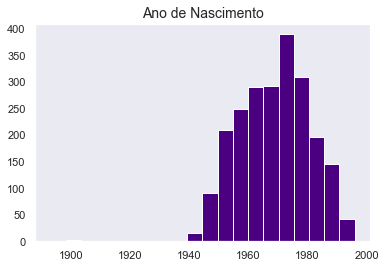

In [18]:
fig, ax = plt.subplots(figsize=(6,4))
plt.hist(df.Year_Birth,bins=20,color='indigo')
ax.set_title('Ano de Nascimento',fontsize=14)
plt.show()

In [149]:
#Visualizando maiores rendas por graduação.

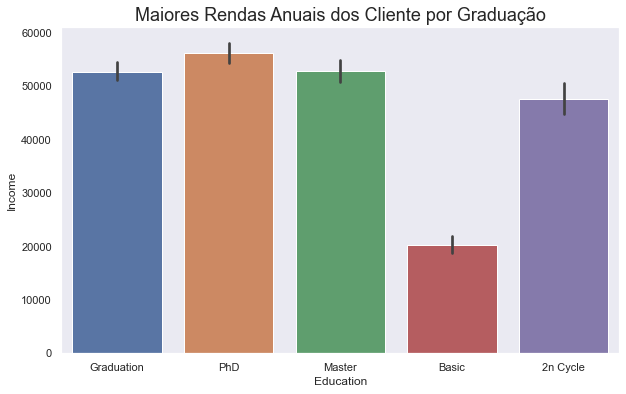

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Education',y='Income',data=df)
plt.title('Maiores Rendas Anuais dos Cliente por Graduação',fontsize=18)
plt.show()

In [148]:
#Descobrindo quantos clientes possuimos com formação Phd.

In [20]:
Doutorados = df['Education'] == 'PhD'
Clientes = df['ID'].value_counts().sum()
print(f'Temos {Clientes} clientes cadastrados no sistema, e apenas {Doutorados.sum()} clientes possuem formação PhD')

Temos 2236 clientes cadastrados no sistema, e apenas 484 clientes possuem formação PhD


In [147]:
#Visualizando os clientes que mais compram pelo site de acordo com suas Graduações.

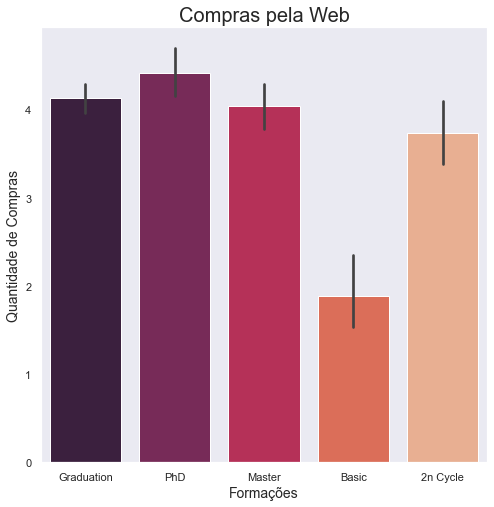

In [21]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x='Education',y='NumWebPurchases',data=df,palette="rocket")
plt.title('Compras pela Web',fontsize=20)
ax.set_xlabel('Formações',fontsize=14)
ax.set_ylabel('Quantidade de Compras',fontsize=14)
plt.show()

In [145]:
#Visualizando os clientes que mais compram diretamente nas lojas de acordo com suas Graduações

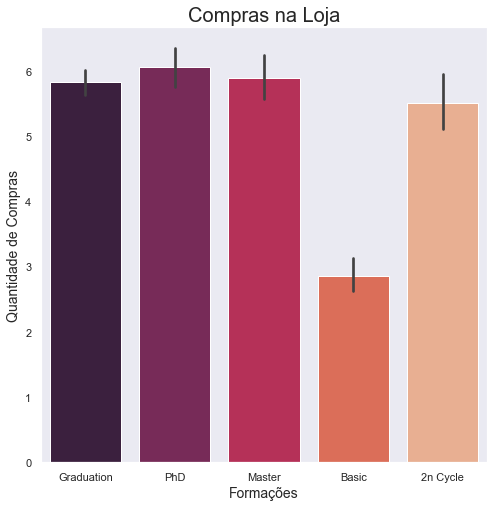

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x='Education',y='NumStorePurchases',data=df,palette="rocket")
plt.title('Compras na Loja',fontsize=20)
ax.set_xlabel('Formações',fontsize=14)
ax.set_ylabel('Quantidade de Compras',fontsize=14)
plt.show()

In [146]:
#Iremos identificar como estão as campanhas de ofertas.

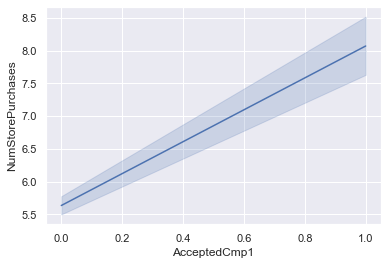

In [103]:

sns.set_theme(style="darkgrid")
sns.lineplot(data=df,x='AcceptedCmp1',y='NumStorePurchases')
plt.show()

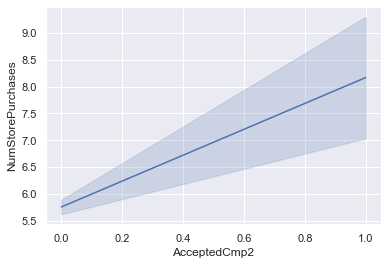

In [104]:
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,x='AcceptedCmp2',y='NumStorePurchases')
plt.show()

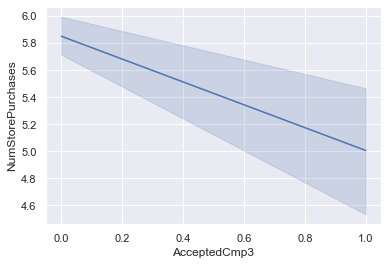

In [105]:
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,x='AcceptedCmp3',y='NumStorePurchases')
plt.show()

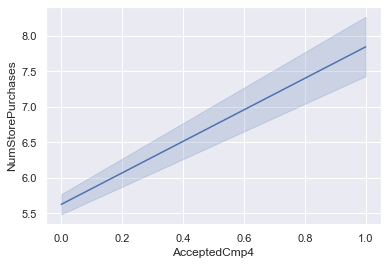

In [106]:
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,x='AcceptedCmp4',y='NumStorePurchases')
plt.show()

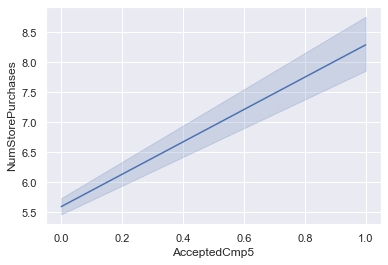

In [107]:
sns.set_theme(style="darkgrid")
sns.lineplot(data=df,x='AcceptedCmp5',y='NumStorePurchases')
plt.show()

<Figure size 1440x720 with 0 Axes>

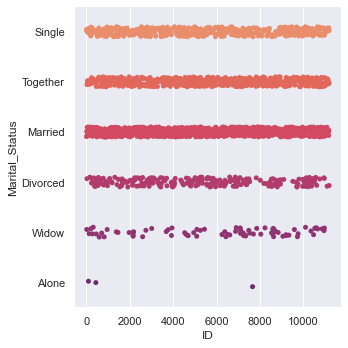

In [144]:
plt.figure(figsize=(20,10))
sns.set_palette('flare')
sns.catplot(data=df,x='ID',y='Marital_Status')
plt.show()

**Possuímos atualmente mais clientes Casados.**

# Conclusões

- **Observamos o total de cada produto vendido, com enfase para MntWines que foi o mais vendido!!**


- **Os clientes que menos compram,são os que mais aceitam as ofertas, exceto na 3º oferta oferecida, onde os clientes           compraram muito mais, porém, tivemos um baixo numero de aceites na oferta.**


- **Conseguimos conciliar que os clientes com a formação Phd, Possuem as maiores rendas,
    tambem compram mais, tanto pelo site, quanto pela loja fisica. E que todos clientes independente de suas formações
    costumam comprar mais nas lojas.**
    
  
- **Temos entre o Top_10 clientes que mais compram, mais graduados. Normalmente o que esses clientes mais compram, são         Carnes e Vinhos, e realizam suas compras diretamente pela loja fisica.**

  
  
- **Vemos que geralmente no fim do mês 08 de cada ano,temos sempre uma grande quantidade de clientes que se cadastram nessa     epóca. Também temos que em geral nossos clientes ficam até 99 dias sem comprar, esses clientes não aceitam nenhuma         campanha de oferta. Entre os 10, 6 são graduados,9 possui filhos. Vemos tambem que, o que cada cliente mais compra         são frutas e ouros.**

 
- **Verificamos que em um dia conseguimos 12 clientes cadastrados, Tanto no arquivo de Analise_Cliente
    quanto aqui, vemos que esse dia foi 31/08/2012.**


- **Conseguimos ver que possuímos uma forte concentração na renda entre 0 e 100.000, se olharmos nosso arquivo
    Análise_Geral.html podemos ver que a média de renda anual por cliente é 52.247, e a mediana está bem próxima a média
    com 51.381.**